In [10]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

Stock name: SBUX
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


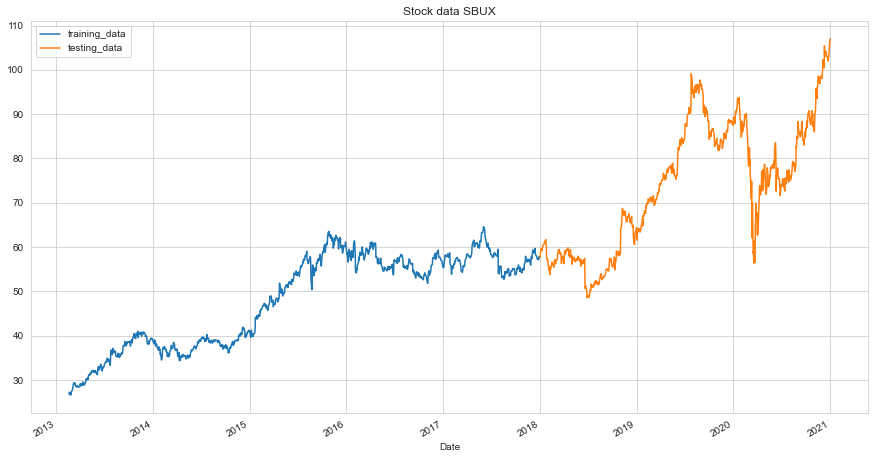

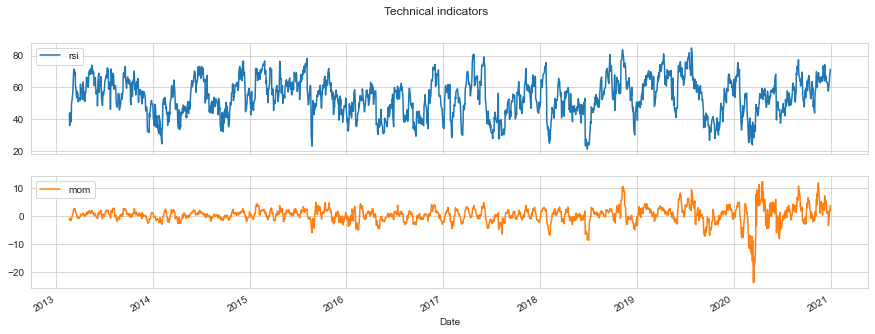

In [11]:
stock_name = 'sbux'.upper()
industry = 'Consumer cyclical'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1421.23, duration: 0:00:00.503111
episode: 2/2000, episode end value: 1414.16, duration: 0:00:00.544122
episode: 3/2000, episode end value: 1441.99, duration: 0:00:00.498108
episode: 4/2000, episode end value: 1441.42, duration: 0:00:00.454103
episode: 5/2000, episode end value: 1441.45, duration: 0:00:00.528118
episode: 6/2000, episode end value: 1442.94, duration: 0:00:00.448100
episode: 7/2000, episode end value: 1441.95, duration: 0:00:00.450102
episode: 8/2000, episode end value: 1441.88, duration: 0:00:00.477106
episode: 9/2000, episode end value: 1442.08, duration: 0:00:00.508113
episode: 10/2000, episode end value: 1441.96, duration: 0:00:00.530119
episode: 11/2000, episode end value: 1441.84, duration: 0:00:00.420095
episode: 12/2000, episode end value: 1441.83, duration: 0:00:00.423093
episode: 13/2000, episode end value: 1550.45, duration: 0:00:00.383091
episode: 14/2000, episode end value: 1428.65, duration: 0:00:00.400092
episode: 15/200

episode: 117/2000, episode end value: 1442.90, duration: 0:00:00.491105
episode: 118/2000, episode end value: 1436.14, duration: 0:00:00.452100
episode: 119/2000, episode end value: 1437.60, duration: 0:00:00.446101
episode: 120/2000, episode end value: 1435.87, duration: 0:00:00.489108
episode: 121/2000, episode end value: 1426.24, duration: 0:00:00.429098
episode: 122/2000, episode end value: 1456.57, duration: 0:00:00.521116
episode: 123/2000, episode end value: 1440.52, duration: 0:00:00.445099
episode: 124/2000, episode end value: 1435.95, duration: 0:00:00.431092
episode: 125/2000, episode end value: 1439.37, duration: 0:00:00.462105
episode: 126/2000, episode end value: 1439.29, duration: 0:00:00.509113
episode: 127/2000, episode end value: 1436.34, duration: 0:00:00.454102
episode: 128/2000, episode end value: 1431.71, duration: 0:00:00.462105
episode: 129/2000, episode end value: 1426.37, duration: 0:00:00.466106
episode: 130/2000, episode end value: 1423.80, duration: 0:00:00

episode: 231/2000, episode end value: 1462.57, duration: 0:00:00.482111
episode: 232/2000, episode end value: 1436.10, duration: 0:00:00.427096
episode: 233/2000, episode end value: 1466.75, duration: 0:00:00.425098
episode: 234/2000, episode end value: 1440.02, duration: 0:00:00.434099
episode: 235/2000, episode end value: 1453.44, duration: 0:00:00.489106
episode: 236/2000, episode end value: 1453.62, duration: 0:00:00.496113
episode: 237/2000, episode end value: 1436.48, duration: 0:00:00.450106
episode: 238/2000, episode end value: 1458.46, duration: 0:00:00.413094
episode: 239/2000, episode end value: 1438.55, duration: 0:00:00.482109
episode: 240/2000, episode end value: 1441.14, duration: 0:00:00.452102
episode: 241/2000, episode end value: 1453.93, duration: 0:00:00.453106
episode: 242/2000, episode end value: 1448.40, duration: 0:00:00.388093
episode: 243/2000, episode end value: 1451.96, duration: 0:00:00.461099
episode: 244/2000, episode end value: 1445.82, duration: 0:00:00

episode: 345/2000, episode end value: 1453.97, duration: 0:00:00.473107
episode: 346/2000, episode end value: 1441.27, duration: 0:00:00.499112
episode: 347/2000, episode end value: 1447.79, duration: 0:00:00.513114
episode: 348/2000, episode end value: 1461.56, duration: 0:00:00.485113
episode: 349/2000, episode end value: 1460.72, duration: 0:00:00.437097
episode: 350/2000, episode end value: 1442.67, duration: 0:00:00.482111
episode: 351/2000, episode end value: 1439.96, duration: 0:00:00.462101
episode: 352/2000, episode end value: 1443.48, duration: 0:00:00.479111
episode: 353/2000, episode end value: 1454.33, duration: 0:00:00.518115
episode: 354/2000, episode end value: 1440.82, duration: 0:00:00.523122
episode: 355/2000, episode end value: 1454.05, duration: 0:00:00.478103
episode: 356/2000, episode end value: 1438.18, duration: 0:00:00.514116
episode: 357/2000, episode end value: 1465.24, duration: 0:00:00.534127
episode: 358/2000, episode end value: 1441.79, duration: 0:00:00

episode: 459/2000, episode end value: 1437.50, duration: 0:00:00.497112
episode: 460/2000, episode end value: 1455.83, duration: 0:00:00.463104
episode: 461/2000, episode end value: 1460.79, duration: 0:00:00.524113
episode: 462/2000, episode end value: 1460.16, duration: 0:00:00.437103
episode: 463/2000, episode end value: 1441.31, duration: 0:00:00.491112
episode: 464/2000, episode end value: 1441.41, duration: 0:00:00.483107
episode: 465/2000, episode end value: 1439.27, duration: 0:00:00.418094
episode: 466/2000, episode end value: 1463.12, duration: 0:00:00.504112
episode: 467/2000, episode end value: 1468.23, duration: 0:00:00.491112
episode: 468/2000, episode end value: 1460.01, duration: 0:00:00.461108
episode: 469/2000, episode end value: 1443.09, duration: 0:00:00.402090
episode: 470/2000, episode end value: 1453.58, duration: 0:00:00.454098
episode: 471/2000, episode end value: 1464.04, duration: 0:00:00.461103
episode: 472/2000, episode end value: 1460.95, duration: 0:00:00

episode: 573/2000, episode end value: 1461.34, duration: 0:00:00.452107
episode: 574/2000, episode end value: 1461.42, duration: 0:00:00.481107
episode: 575/2000, episode end value: 1459.61, duration: 0:00:00.437091
episode: 576/2000, episode end value: 1461.94, duration: 0:00:00.437095
episode: 577/2000, episode end value: 1440.75, duration: 0:00:00.474106
episode: 578/2000, episode end value: 1444.73, duration: 0:00:00.449105
episode: 579/2000, episode end value: 1438.02, duration: 0:00:00.501110
episode: 580/2000, episode end value: 1440.70, duration: 0:00:00.521117
episode: 581/2000, episode end value: 1452.49, duration: 0:00:00.510117
episode: 582/2000, episode end value: 1452.38, duration: 0:00:00.424095
episode: 583/2000, episode end value: 1446.72, duration: 0:00:00.517115
episode: 584/2000, episode end value: 1462.89, duration: 0:00:00.443097
episode: 585/2000, episode end value: 1453.63, duration: 0:00:00.459103
episode: 586/2000, episode end value: 1444.62, duration: 0:00:00

episode: 687/2000, episode end value: 1460.55, duration: 0:00:00.456100
episode: 688/2000, episode end value: 1441.80, duration: 0:00:00.446102
episode: 689/2000, episode end value: 1458.52, duration: 0:00:00.446097
episode: 690/2000, episode end value: 1462.45, duration: 0:00:00.455103
episode: 691/2000, episode end value: 1452.16, duration: 0:00:00.496115
episode: 692/2000, episode end value: 1443.83, duration: 0:00:00.536121
episode: 693/2000, episode end value: 1440.63, duration: 0:00:00.435096
episode: 694/2000, episode end value: 1444.78, duration: 0:00:00.490109
episode: 695/2000, episode end value: 1447.10, duration: 0:00:00.382080
episode: 696/2000, episode end value: 1463.61, duration: 0:00:00.416095
episode: 697/2000, episode end value: 1442.19, duration: 0:00:00.455103
episode: 698/2000, episode end value: 1441.94, duration: 0:00:00.436103
episode: 699/2000, episode end value: 1438.37, duration: 0:00:00.485105
episode: 700/2000, episode end value: 1450.56, duration: 0:00:00

episode: 801/2000, episode end value: 1462.24, duration: 0:00:00.432100
episode: 802/2000, episode end value: 1461.59, duration: 0:00:00.414092
episode: 803/2000, episode end value: 1440.34, duration: 0:00:00.442099
episode: 804/2000, episode end value: 1457.76, duration: 0:00:00.466108
episode: 805/2000, episode end value: 1449.62, duration: 0:00:00.410096
episode: 806/2000, episode end value: 1462.90, duration: 0:00:00.410095
episode: 807/2000, episode end value: 1448.22, duration: 0:00:00.463104
episode: 808/2000, episode end value: 1459.36, duration: 0:00:00.483111
episode: 809/2000, episode end value: 1470.99, duration: 0:00:00.429101
episode: 810/2000, episode end value: 1456.31, duration: 0:00:00.398088
episode: 811/2000, episode end value: 1442.68, duration: 0:00:00.432099
episode: 812/2000, episode end value: 1442.13, duration: 0:00:00.446100
episode: 813/2000, episode end value: 1468.46, duration: 0:00:00.466107
episode: 814/2000, episode end value: 1459.27, duration: 0:00:00

episode: 915/2000, episode end value: 1443.32, duration: 0:00:00.443099
episode: 916/2000, episode end value: 1459.92, duration: 0:00:00.409089
episode: 917/2000, episode end value: 1455.97, duration: 0:00:00.411096
episode: 918/2000, episode end value: 1459.47, duration: 0:00:00.440098
episode: 919/2000, episode end value: 1445.35, duration: 0:00:00.481112
episode: 920/2000, episode end value: 1438.87, duration: 0:00:00.499111
episode: 921/2000, episode end value: 1476.03, duration: 0:00:00.413090
episode: 922/2000, episode end value: 1461.05, duration: 0:00:00.464105
episode: 923/2000, episode end value: 1446.23, duration: 0:00:00.483107
episode: 924/2000, episode end value: 1460.88, duration: 0:00:00.466110
episode: 925/2000, episode end value: 1456.82, duration: 0:00:00.447100
episode: 926/2000, episode end value: 1444.64, duration: 0:00:00.455103
episode: 927/2000, episode end value: 1461.16, duration: 0:00:00.448104
episode: 928/2000, episode end value: 1440.60, duration: 0:00:00

episode: 1029/2000, episode end value: 1461.33, duration: 0:00:00.461104
episode: 1030/2000, episode end value: 1440.57, duration: 0:00:00.453102
episode: 1031/2000, episode end value: 1440.83, duration: 0:00:00.408092
episode: 1032/2000, episode end value: 1440.02, duration: 0:00:00.533118
episode: 1033/2000, episode end value: 1446.42, duration: 0:00:00.362081
episode: 1034/2000, episode end value: 1445.52, duration: 0:00:00.479106
episode: 1035/2000, episode end value: 1446.42, duration: 0:00:00.512116
episode: 1036/2000, episode end value: 1447.89, duration: 0:00:00.433097
episode: 1037/2000, episode end value: 1484.12, duration: 0:00:00.394092
episode: 1038/2000, episode end value: 1456.53, duration: 0:00:00.509116
episode: 1039/2000, episode end value: 1459.75, duration: 0:00:00.466106
episode: 1040/2000, episode end value: 1459.66, duration: 0:00:00.447105
episode: 1041/2000, episode end value: 1458.99, duration: 0:00:00.418092
episode: 1042/2000, episode end value: 1441.56, dur

episode: 1142/2000, episode end value: 1482.63, duration: 0:00:00.383087
episode: 1143/2000, episode end value: 1450.55, duration: 0:00:00.444100
episode: 1144/2000, episode end value: 1460.17, duration: 0:00:00.487110
episode: 1145/2000, episode end value: 1441.50, duration: 0:00:00.461101
episode: 1146/2000, episode end value: 1442.96, duration: 0:00:00.523116
episode: 1147/2000, episode end value: 1468.46, duration: 0:00:00.451108
episode: 1148/2000, episode end value: 1443.68, duration: 0:00:00.487108
episode: 1149/2000, episode end value: 1457.10, duration: 0:00:00.510113
episode: 1150/2000, episode end value: 1450.73, duration: 0:00:00.538121
episode: 1151/2000, episode end value: 1445.64, duration: 0:00:00.486109
episode: 1152/2000, episode end value: 1441.10, duration: 0:00:00.505117
episode: 1153/2000, episode end value: 1443.14, duration: 0:00:00.493114
episode: 1154/2000, episode end value: 1453.54, duration: 0:00:00.503109
episode: 1155/2000, episode end value: 1446.00, dur

episode: 1255/2000, episode end value: 1462.76, duration: 0:00:00.382080
episode: 1256/2000, episode end value: 1443.28, duration: 0:00:00.445106
episode: 1257/2000, episode end value: 1438.12, duration: 0:00:00.398088
episode: 1258/2000, episode end value: 1448.45, duration: 0:00:00.362083
episode: 1259/2000, episode end value: 1440.60, duration: 0:00:00.433098
episode: 1260/2000, episode end value: 1452.57, duration: 0:00:00.413093
episode: 1261/2000, episode end value: 1446.66, duration: 0:00:00.389088
episode: 1262/2000, episode end value: 1478.53, duration: 0:00:00.354082
episode: 1263/2000, episode end value: 1445.75, duration: 0:00:00.407090
episode: 1264/2000, episode end value: 1461.71, duration: 0:00:00.353080
episode: 1265/2000, episode end value: 1442.88, duration: 0:00:00.426092
episode: 1266/2000, episode end value: 1450.40, duration: 0:00:00.388090
episode: 1267/2000, episode end value: 1453.89, duration: 0:00:00.440095
episode: 1268/2000, episode end value: 1474.15, dur

episode: 1368/2000, episode end value: 1455.63, duration: 0:00:00.394093
episode: 1369/2000, episode end value: 1441.53, duration: 0:00:00.380081
episode: 1370/2000, episode end value: 1465.10, duration: 0:00:00.368087
episode: 1371/2000, episode end value: 1447.03, duration: 0:00:00.486106
episode: 1372/2000, episode end value: 1443.62, duration: 0:00:00.395087
episode: 1373/2000, episode end value: 1444.49, duration: 0:00:00.386088
episode: 1374/2000, episode end value: 1452.93, duration: 0:00:00.418096
episode: 1375/2000, episode end value: 1444.01, duration: 0:00:00.435098
episode: 1376/2000, episode end value: 1455.19, duration: 0:00:00.362082
episode: 1377/2000, episode end value: 1451.97, duration: 0:00:00.434098
episode: 1378/2000, episode end value: 1444.55, duration: 0:00:00.420096
episode: 1379/2000, episode end value: 1451.21, duration: 0:00:00.349076
episode: 1380/2000, episode end value: 1443.02, duration: 0:00:00.392089
episode: 1381/2000, episode end value: 1442.87, dur

episode: 1481/2000, episode end value: 1441.59, duration: 0:00:00.402090
episode: 1482/2000, episode end value: 1450.63, duration: 0:00:00.416095
episode: 1483/2000, episode end value: 1447.06, duration: 0:00:00.370083
episode: 1484/2000, episode end value: 1461.58, duration: 0:00:00.392087
episode: 1485/2000, episode end value: 1452.50, duration: 0:00:00.381085
episode: 1486/2000, episode end value: 1454.91, duration: 0:00:00.433096
episode: 1487/2000, episode end value: 1454.68, duration: 0:00:00.385084
episode: 1488/2000, episode end value: 1461.49, duration: 0:00:00.398094
episode: 1489/2000, episode end value: 1460.40, duration: 0:00:00.431093
episode: 1490/2000, episode end value: 1453.02, duration: 0:00:00.434098
episode: 1491/2000, episode end value: 1458.16, duration: 0:00:00.399090
episode: 1492/2000, episode end value: 1452.80, duration: 0:00:00.480111
episode: 1493/2000, episode end value: 1463.85, duration: 0:00:00.381084
episode: 1494/2000, episode end value: 1460.68, dur

episode: 1594/2000, episode end value: 1455.38, duration: 0:00:00.267060
episode: 1595/2000, episode end value: 1441.36, duration: 0:00:00.258061
episode: 1596/2000, episode end value: 1467.61, duration: 0:00:00.241053
episode: 1597/2000, episode end value: 1454.16, duration: 0:00:00.263058
episode: 1598/2000, episode end value: 1450.04, duration: 0:00:00.251070
episode: 1599/2000, episode end value: 1441.86, duration: 0:00:00.264046
episode: 1600/2000, episode end value: 1443.83, duration: 0:00:00.266057
episode: 1601/2000, episode end value: 1441.91, duration: 0:00:00.263060
episode: 1602/2000, episode end value: 1469.19, duration: 0:00:00.248054
episode: 1603/2000, episode end value: 1472.31, duration: 0:00:00.256055
episode: 1604/2000, episode end value: 1444.29, duration: 0:00:00.256059
episode: 1605/2000, episode end value: 1446.14, duration: 0:00:00.259056
episode: 1606/2000, episode end value: 1450.85, duration: 0:00:00.260058
episode: 1607/2000, episode end value: 1462.69, dur

episode: 1707/2000, episode end value: 1443.69, duration: 0:00:00.247053
episode: 1708/2000, episode end value: 1458.60, duration: 0:00:00.222049
episode: 1709/2000, episode end value: 1472.02, duration: 0:00:00.230053
episode: 1710/2000, episode end value: 1440.55, duration: 0:00:00.242054
episode: 1711/2000, episode end value: 1449.66, duration: 0:00:00.230050
episode: 1712/2000, episode end value: 1465.70, duration: 0:00:00.224052
episode: 1713/2000, episode end value: 1445.90, duration: 0:00:00.240052
episode: 1714/2000, episode end value: 1441.32, duration: 0:00:00.247056
episode: 1715/2000, episode end value: 1460.62, duration: 0:00:00.225050
episode: 1716/2000, episode end value: 1452.87, duration: 0:00:00.225050
episode: 1717/2000, episode end value: 1447.51, duration: 0:00:00.225051
episode: 1718/2000, episode end value: 1440.08, duration: 0:00:00.245052
episode: 1719/2000, episode end value: 1447.42, duration: 0:00:00.233056
episode: 1720/2000, episode end value: 1443.52, dur

episode: 1820/2000, episode end value: 1471.22, duration: 0:00:00.219049
episode: 1821/2000, episode end value: 1442.69, duration: 0:00:00.234051
episode: 1822/2000, episode end value: 1440.72, duration: 0:00:00.225049
episode: 1823/2000, episode end value: 1445.51, duration: 0:00:00.231055
episode: 1824/2000, episode end value: 1452.15, duration: 0:00:00.248055
episode: 1825/2000, episode end value: 1444.23, duration: 0:00:00.241053
episode: 1826/2000, episode end value: 1439.34, duration: 0:00:00.222049
episode: 1827/2000, episode end value: 1451.40, duration: 0:00:00.217049
episode: 1828/2000, episode end value: 1461.95, duration: 0:00:00.216047
episode: 1829/2000, episode end value: 1451.36, duration: 0:00:00.225069
episode: 1830/2000, episode end value: 1445.25, duration: 0:00:00.232033
episode: 1831/2000, episode end value: 1450.38, duration: 0:00:00.246052
episode: 1832/2000, episode end value: 1460.99, duration: 0:00:00.207061
episode: 1833/2000, episode end value: 1470.99, dur

episode: 1933/2000, episode end value: 1443.09, duration: 0:00:00.213047
episode: 1934/2000, episode end value: 1469.55, duration: 0:00:00.208047
episode: 1935/2000, episode end value: 1453.94, duration: 0:00:00.223050
episode: 1936/2000, episode end value: 1443.78, duration: 0:00:00.222049
episode: 1937/2000, episode end value: 1433.20, duration: 0:00:00.215055
episode: 1938/2000, episode end value: 1441.87, duration: 0:00:00.227038
episode: 1939/2000, episode end value: 1453.77, duration: 0:00:00.214048
episode: 1940/2000, episode end value: 1474.98, duration: 0:00:00.205048
episode: 1941/2000, episode end value: 1445.48, duration: 0:00:00.223047
episode: 1942/2000, episode end value: 1451.64, duration: 0:00:00.212048
episode: 1943/2000, episode end value: 1461.60, duration: 0:00:00.220048
episode: 1944/2000, episode end value: 1460.12, duration: 0:00:00.223037
episode: 1945/2000, episode end value: 1445.03, duration: 0:00:00.219064
episode: 1946/2000, episode end value: 1469.09, dur

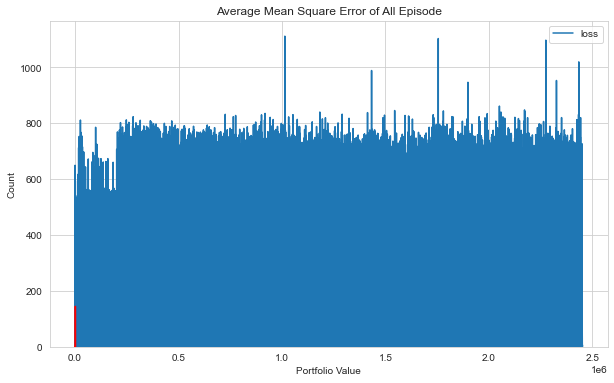

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

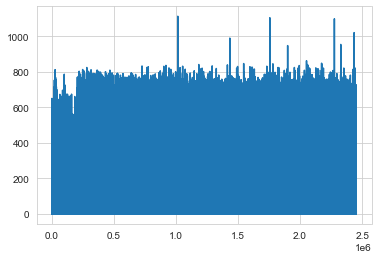

In [5]:
plt.plot(agent.model.losses)

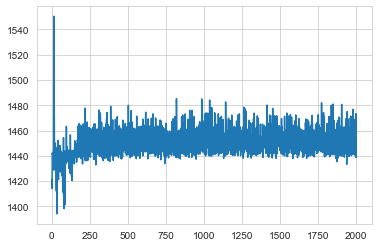

In [6]:
plt.plot(portfolio_value)

episode end value: 1336.66, duration: 0:00:00.100024
Sell: 409 times, Buy: 339 times


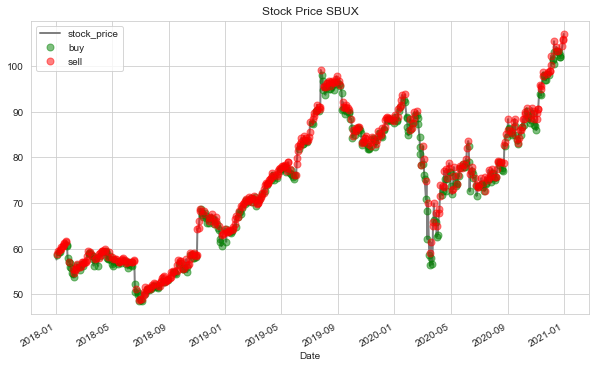

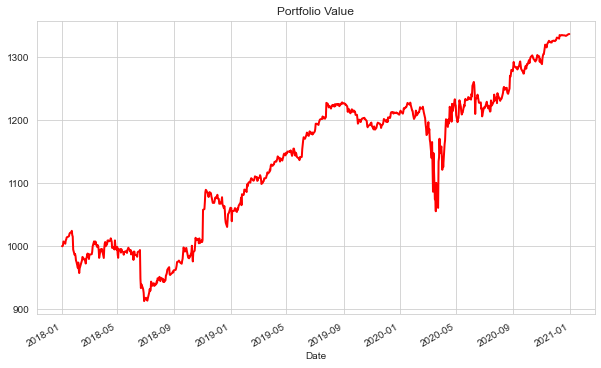

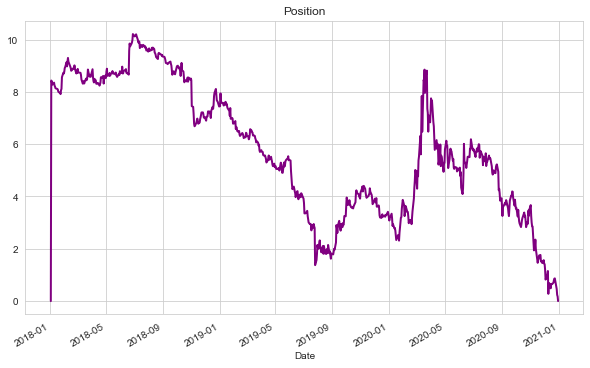

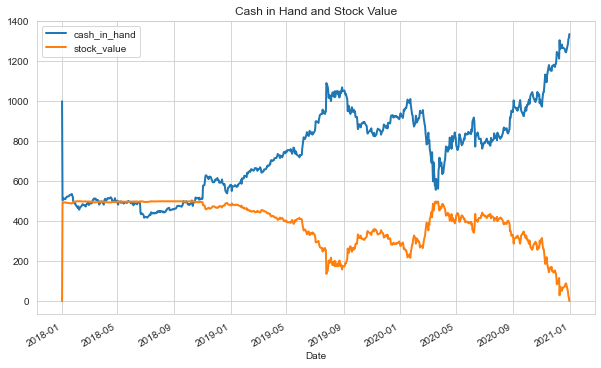

In [12]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [13]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: SBUX
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 10.16 %
Volatility: 0.1244
shape ratio: 0.7279
Maximun drawdown: -14.07 %
Calmar ratio: 0.7221
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 22.90 %
Volatility (benchmark): 0.3159
shape ratio: 0.6901
Maximun drawdown: -43.16 %
Calmar ratio (benchmark): 0.5305


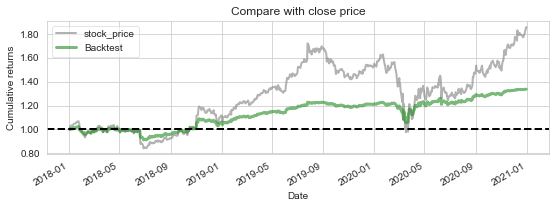

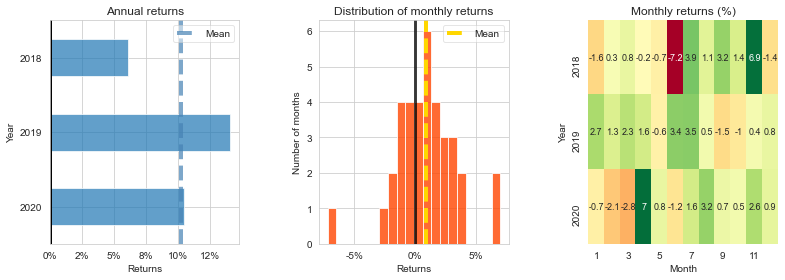

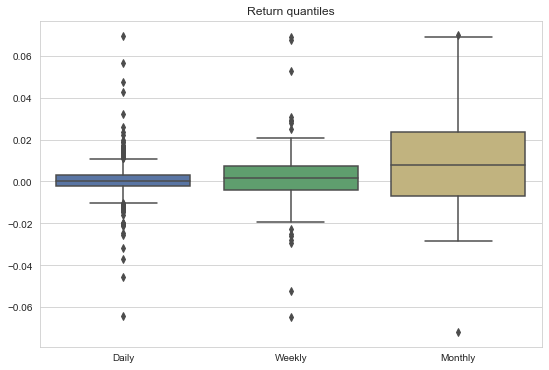

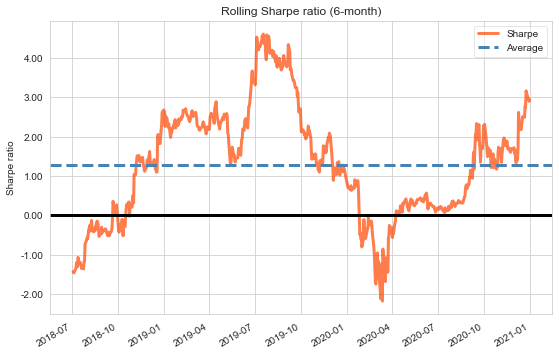

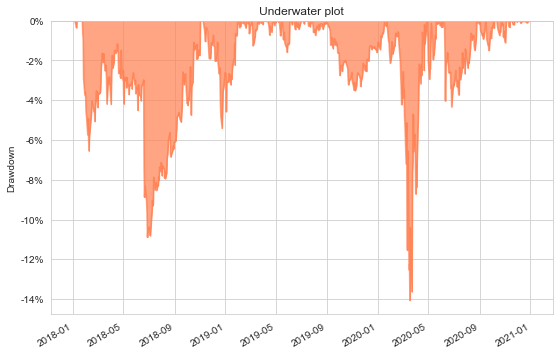

In [14]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')